
mach-zender_interferometer_time_main.py



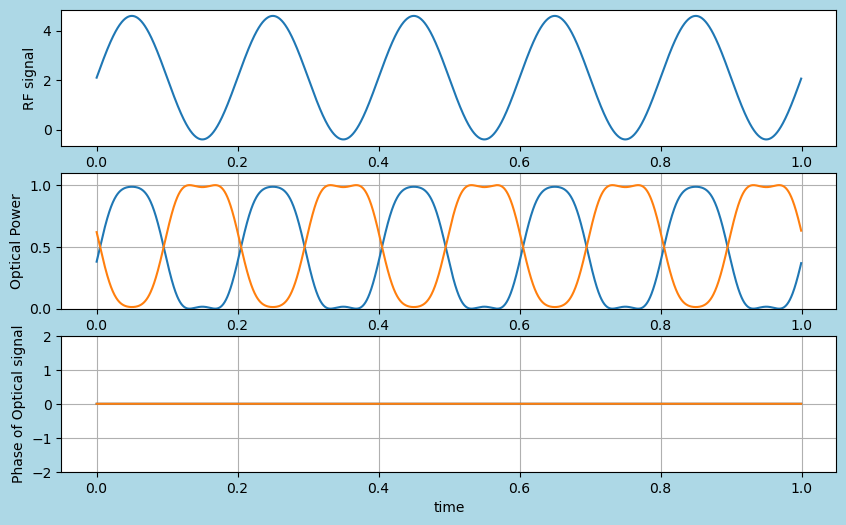

In [1]:

import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

import mach_zender_interferometer_time_def

print('')
print('mach-zender_interferometer_time_main.py')
print('')

samplerate = 2048 # Sampling Frequency

stept = 1/samplerate

amp_c = 2.5
freq_am = 5
md = 1 # modulation depth. 1 = 100 %
dc_offset = 2.1 # DC offset

no = 1 # Refractive Index of medium

oplcommon1=100 #Common Path Length 1
oplcommon2=100 #Common Path Length 2

opl1 =100 
opl2= 100
# Optical Path Length Difference (opl1-opl2) determines free spectral range as optical filter.

wl = 0.633; #wavelength in um

PT1 = 0.5 # PT: Power Transmission of first beam splitter
PT2 = 0.5 # PT: Power Transmission of second beam splitter

# Define Input Electric Field

# Input Port 1 only
Ein1 = np.array([[1+0.0000j],[0-0.0000j]])
#Ein1 = np.array([[0.707+0.707j],[0]])

# Input Both 1 and 2 port
#Ein1 = np.array([[1+0j],[1-0j]]) 
#Ein1 = np.array([[0.707+0.707j],[-0.707-0.707j]])
#Ein1 = np.array([[1 + 0j],[-1 - 0j]])

# Input Port 2 only
#Ein1 = np.array([[0],[1]]) 
#Ein1 = np.array([[0],[0.707+0.707j]])

tcol = np.zeros(samplerate)
signalcol = np.zeros(samplerate)

P1_powercol = np.zeros(samplerate)
P1_phasecol = np.zeros(samplerate)

P2_powercol = np.zeros(samplerate)
P2_phasecol = np.zeros(samplerate)


for ii in range(samplerate):
    
    t = stept * ii
    tcol[ii] = t

    signal = amp_c * np.sin(2 * np.pi * freq_am * t) + dc_offset
    signalcol[ii] = signal  
    
    Eout1 = mach_zender_interferometer_time_def.propagate1(wl, no, oplcommon1, oplcommon2, Ein1)
    Ein2 = Eout1
    
    Eout2 = mach_zender_interferometer_time_def.beamsplitter(PT1, Ein2)
    # Beam enter first beam splitter (or Fiber Coupler)
    Ein3 = Eout2
    
    Eout3 = mach_zender_interferometer_time_def.propagate1(wl, no, opl1, opl2+signal, Ein3)
    # Each path experience different path length
    Ein4 = Eout3
    
    Eout4 = mach_zender_interferometer_time_def.beamsplitter(PT2, Ein4)
    # Each path enter second beam splitter (or Fiber Coupler)
    Ein5 = Eout4
    
    Eout5 = mach_zender_interferometer_time_def.propagate1(wl, no, oplcommon1, oplcommon2, Ein5)
    Ein6 = Eout5
    
    Eout_port1 = Ein6[0,0] 
    power_11 = (np.abs(Eout_port1))**2 # Optical power is calculated as square of absolute electric field strength
    P1_powercol[ii] = power_11
    
    P1_phase = cmath.phase(power_11)
    P1_phasecol[ii] = P1_phase
    
    Eout_port_2 = Ein6[1,0]
    power_22 = (np.abs(Eout_port_2))**2
    
    P2_powercol[ii] = power_22
    
    P2_phase = cmath.phase(power_22)
    P2_phasecol[ii] = P2_phase
 
 

fig = plt.figure(figsize = (10,6), facecolor='lightblue')

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(tcol,signalcol)
ax1.set_ylabel("RF signal")
#ax1.set_ylim(-3,3)

ax2.plot(tcol,P1_powercol,tcol,P2_powercol)

ax2.set_ylabel("Optical Power")
ax2.set_ylim(0,1.1)
ax2.grid()

ax3.plot(tcol,P1_phasecol,tcol,P2_phasecol)
ax3.set_xlabel("time")
ax3.set_ylabel("Phase of Optical signal")
ax3.set_ylim(-2,2)
ax3.grid()

plt.show()


